In [3]:
from IPython.display import Image

# GRU 셀
- LSTM 셀의 간소화 버전
- keras.layers.GRU 층 제공
    - 이 층을 사용하려면 SimpleRNN이나 LSTM을 GRU로 바꾸면 됨

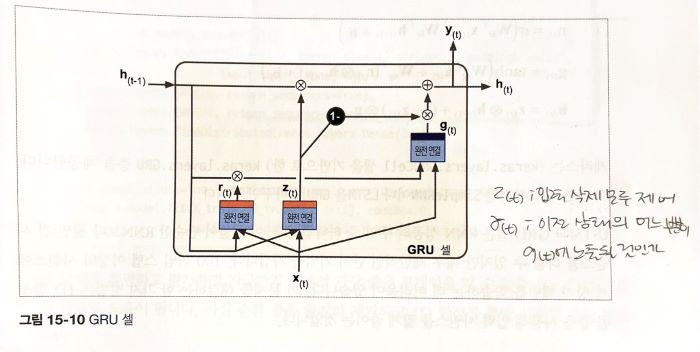

In [7]:
Image("pic_15_10.jpg")

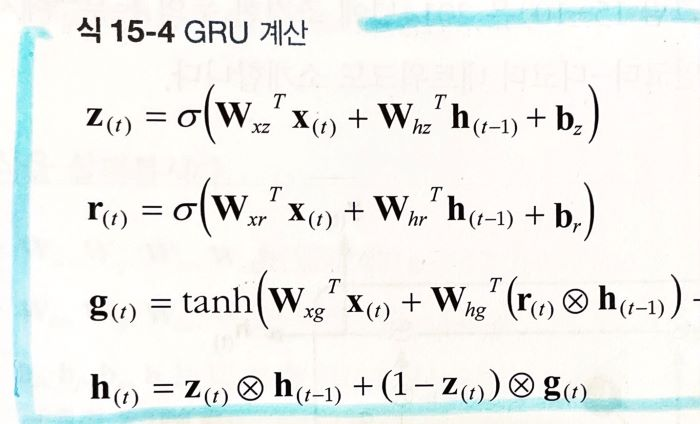

In [6]:
Image("식_15_4.jpg")

- CRU셀은 RNN보다 훨씬 긴 시퀀스를 가질 수 있음. 그러나, 매우 제한적인 단기 기억을 가짐
    - 1D 합성곱 층을 사용해 입력 시퀀스를 줄이는 방법이 있음

## 1D 합성곱 층을 사용해 시퀀스 처리하기
- CNN에서 2D 합성곱 층이 이미지에 대해 작은 커널(필터로) 위로 슬라이딩하여 2D 특성 맵을 만드는 식과 비슷함

- 1D 합성곱 층이 몇 개의 커널이 시퀀스 위를 슬라이딩하여 커널마다 1D 특성맵 출력
    - 스트라이드 1과 same 패딩인 경우, 출력 시퀀스 = 입력 시퀀스
    - 1보다 큰 스트라이드와 valid 패딩 사용, 출력 시퀀스 < 입력 시퀀스
    
- 모델이 중요하지 않은 세부 사항은 버리고, 유용한 정보를 보존

In [ ]:
model = keras.models.Sequentail([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid", input_shape=[None,1]),
    keras.layers.GRU(20, return_sequence=True),
    keras.layers.GRU(20, return_sequence=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,validation_data=(X_valid,Y_valid[:,3::2])])

# WAVENET

- WAVENET은 층마다 팽창 비율을 두 배로 늘리는 1D 합성곱 층을 쌓음


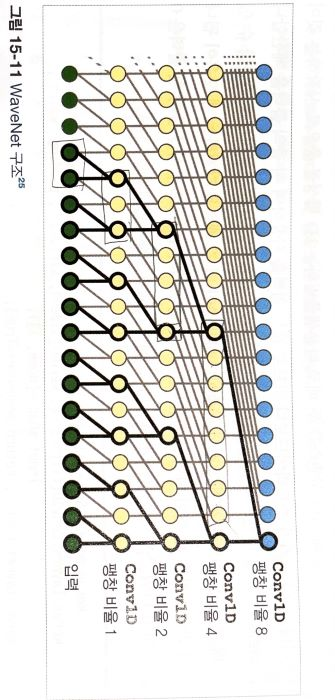

In [10]:
Image("pic_15_11.jpg")

- 하위 층은 단기 패턴을 학습, 상위 층은 장기 패턴을 학습
- 아주 긴 시퀀스를 효율적 처리 가능
- 팽창 비율이 2의 배수로 증가하는 합성곱 층을 10개 쌓았을 때, 1,024 크기의 커널 한 개로 이루어진 합성곱 층처럼 작동함

In [ ]:
model = keras.models.Seqiential()
model.add(keras.layers.InputLayer(input_shape=[None,1]))

for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal", 
                                    # padding="causal" 미래의 시퀀스를 훔쳐보지 않음
                                    # 입력 왼쪽에 0을 알맞게 패딩하고 "valid 패딩을 사용하는 것과 같음"
                                    # 이 작업으로 인해 모든 합성곱 층은 입력 시퀀스 길이와 동일한 시퀀스 출력
                                    activation="relu", dilation_rate=rate))

model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.complie(loss="mse",optimizer="adam",metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid,Y_valid))